# Lab 1: Probability Theory
## W203: Statistics for Data Science



## 1. Meanwhile, at the Unfair Coin Factory...

You are given a bucket that contains 100 coins.  99 of these are fair coins, but one of them is a trick coin that always comes up heads.  You select one coin from this bucket at random.  Let T be the event that you select the trick coin.  This means that $P(T) = 0.01$.

> a. Suppose you flip the coin once and it comes up heads.  Call this event $H_1$.  If this event occurs, what is the conditional probability that you have the trick coin?  In other words, what is $P(T|H_1)$?

---
Given 100 coins whose individual events (*heads and tails* or, in the case of the trick coin, *heads and heads*) are mutually exclusive, there exist 200 individual outcomes from selecting one coin at random and flipping it.  Knowing that the trick coin *always* reveals heads, of these 200 outcomes, there exist 99 tail events and 101 head events.  The probability of one outcome being heads is as follows:

\begin{equation}
\begin{split}
P(H_1) & = \frac{101}{200} \\ \\
& = 0.505
\end{split}
\end{equation}

An area diagram documenting the percentages of events is as follows:

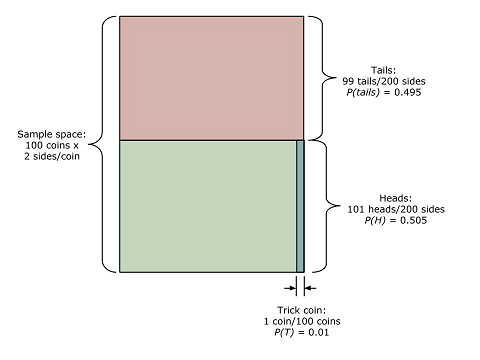

The area representing the intersection of heads events and the trick coin selection event is equivalent to the number of trick coin head events (2) within the entire event sample space of 200 potential outcomes.  Therefore,

\begin{equation}
\begin{split}
P(T \cap H_1) & = \frac{2}{200} \\ \\
& = 0.01
\end{split}
\end{equation}

Calculating the probability of selecting the trick coin conditional upon one coin flip revealing heads is as follows:

\begin{equation}
\begin{split}
P(T|H_1) & = \dfrac{P(T \cap H_1)}{P(H_1)} \\ \\
& = \frac{0.01}{0.505} \\ \\
& = 0.0198
\end{split}
\end{equation}

##### Therefore, $P(T|H_1) = 0.0198$.

---

> b. Suppose instead that you flip the coin $k$ times.  Let $H_k$ be the event that the coin comes up heads all $k$ times.  If you see this occur, what is the conditional probability that you have the trick coin?  In other words, what is $P(T|H_k)$.

---

Let:
* $P(F)$ represent the probability of selecting a fair coin, calculated as $P(F) = 1 - P(T) = 0.99$.
* $H_F$ represent the event of revealing a head when flipping a fair coin once.
* $H_1$ represent the event of revealing a head when flipping the trick coin once (as defined with the problem, above).
* $N_F$ represent the event of revealing a tail when flipping a fair coin once.
* $H_{Fk}$ represent the event of revealing $k$ consecutive heads using a fair coin.
* $H_{k}$ represent the event of revealing $k$ consecutive heads using the trick coin.

Assume:
* Flipping a fair coin reveals a head or a tail with equal probability (i.e. $P(H_F) = 0.5$ and $P(N_F) = 1 - P(H_F) = 0.5$).

Using a fair coin, the probability of revealing a head with each flip decreases exponentially due to the multiplication rule.  For example, the probability of revealing two consecutive heads can be calculated as follows:

\begin{equation}
\begin{split}
P(H_{F2}) & = P(H_F) \cdot P(H_F) \\
& = 0.5 \cdot 0.5 \\
& = 0.5^2 \\
& = 0.25
\end{split}
\end{equation}

The same calculation holds true for the flip of the trick coin, but the probability of revealing a head is always $1$:

\begin{equation}
\begin{split}
P(H_2) & = P(H_1) \cdot P(H_1) \\
& = 1 \cdot 1 \\
& = 1^2 \\
& = 1
\end{split}
\end{equation}

The probability of having selected the one trick coin from the collection of 100 coins remains constant at $P(T) = 0.01$.  Therefore, because the probabilty of revealing a head with the trick coin is always $1$, the probability of revealing $k$ consecutive heads remains constant:

\begin{equation}
\begin{split}
P(T \cap H_k) & = P(T) \cdot P(H_1)^k \\
& = 0.01 \cdot 1^k \\
& = 0.01
\end{split}
\end{equation}

The conditional probability of having selected the trick coin given consecutive revealed heads increases, as the conditional probability of having selected a fair coin given consecutive revealed heads decreases.  Calculating the conditional probability of having selected the trick coin given $k$ consecutive revealed heads revealed can be performed as follows:

\begin{equation}
\begin{split}
P(T|H_k) & = \frac{P(T \cap H_k)}{(P(H_{F})^k \cdot P(F)) + (P(H_1)^k \cdot P(T))} \\ \\
& = \frac{0.01}{(0.5^k \cdot 0.99) + (1^k \cdot 0.01)} \\ \\
& = \frac{0.01}{(0.5^k \cdot 0.99) + 0.01} \\
\end{split}
\end{equation}

##### Therefore, $P(T|H_k)$ can be calculated using the following equation: $\dfrac{0.01}{(0.5^k \cdot 0.99) + 0.01}$

---

> c. How many heads in a row would you need to observe in order for the conditional probability that you have the trick coin to be higher than 99%?

---

The following R snippet calculates the number of consecutive head events required for the conditional probability that the trick coin was selected is greater than 99%:


In [3]:
# Probability definitions
p_trick <- 0.01
p_fair <- 0.99
p_fairhead <- 0.5
p_trickhead <- 1

# Function calculating P(T|H_k), derived from answer to problem 1b
p_conditional <- function(k) {
  p_fairhead_k <- p_fairhead ^ k
  return(p_trick / ((p_fair * p_fairhead_k) + p_trick))
}

# Iterate through coin tosses, calculating the probability accordingly.
# Stop and print the number of tosses performed with the probability
# exceeds 99$.
tosses <- 0
p_incremental <- 0
while (p_incremental <= 0.99) {
  tosses <- tosses + 1
  p_incremental <- p_conditional(tosses)
}
print(paste("Consecutive heads required for 99% probability:", tosses))

[1] "Consecutive heads required for 99% probability: 14"


##### Therefore, the number of consecutive head events required for the conditional probability that the trick coin was selected is greater than 99% is 14.

---

## 2.  Wise Investments 

You invest in two startup companies focused on data science.  Thanks to your growing expertise in this area, each company will reach unicorn status (valued at \\$1 billion) with probability 3/4, independent of the other company.  Let random variable $X$ be the total number of companies that reach unicorn status.  X can take on the values 0, 1, and 2.  Note: $X$ is what we call a binomial random variable with parameters $n=2$ and $p=3/4$.

a. Give a complete expression for the probability mass function of $X$.

b. Give a complete expression for the cumulative probability function of $X$.

c. Compute $E(X)$.

d. Compute $var(X)$.

## 3. A Really Bad Darts Player

Let $X$ and $Y$ be independent uniform random variables on the interval $[-1,1]$.  Let $D$ be a random variable that indicates if $(X,Y)$ falls within the unit circle centered at the origin.  We can define $D$ as follows:
}}$
$$ D = \begin{cases}
1, &X^2 + Y^2 < 1 \\
0, &otherwise
\end{cases}
$$

Note that $D$ is a Bernoulli variable.

---
### Probability density functions for random variables X and Y

Given that random variables $X$ and $Y$ are continuous and uniform on the interval $[-1,1]$, their probability density functions (pdf) can be represented as follows:

$$
f(x; A, B) = \begin{cases}
\dfrac{1}{B - A} & A \le x \le B \\
0 & otherwise
\end{cases}
$$

Substituting the bounds of the interval on which $X$ and $Y$ are defined for $A$ and $B$, their pdf and graphical representation can be defined as follows (note that because both $X$ and $Y$ share the same properties, only the pdf for $X$ is shown):

$$
f(x; -1, 1) = \begin{cases}
\dfrac{1}{2} & -1 \le x \le 1 \\
0 & otherwise
\end{cases}
$$

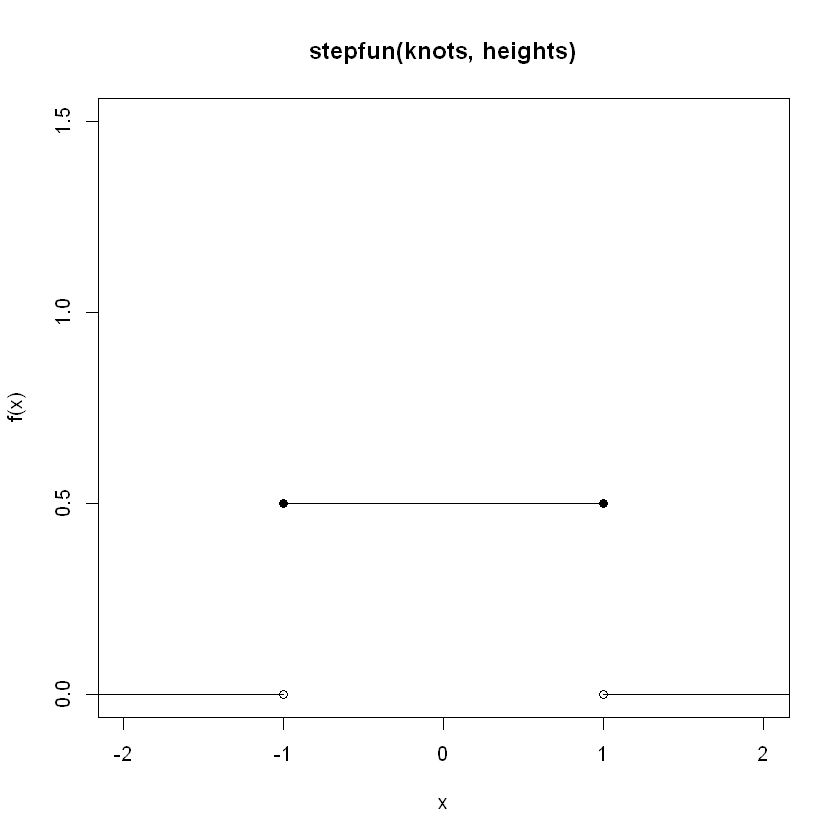

In [22]:
a <- -1; b <- 1; min_x <- a - 1; max_x <- b + 1; prob_x <- 1 / (b - a);
knots <- c(a, b); heights <- c(0, prob_x, 0);
plot(stepfun(knots, heights), verticals = FALSE, xlab="x", ylab="f(x)", xlim = c(-2, 2), ylim = c(0, 1.5), do.points = FALSE)
points(c(a, b), c(0, 0), pch = 1)
points(c(a, b), c(prob_x, prob_x), pch = 19)

### Sample space and "target" geometries

The intervals of random variables $X$ and $Y$ define a sample space that is square, has a width and length of 2, and is centered on the origin $(0, 0)$.  On a Cartesian plane, this sample space is represented as follows:

<< TODO: PLOT OF SQUARE HERE >>

Values of these random variables can be represented as $(x, y)$ coordinates on this plane.

The "target" area for which we are calculating probabilities is a unit circle, also centered on the origin $(0, 0)$ of a Cartesian plane.  $D$, a random Bernoulli variable, is defined with its value being assigned $1$ when $X^2 + Y^2 < 1$.  Given the Pythagorean theorem, with adjacent and opposite lengths of a right triangle represented by $a$ and $b$:

$$
a^2 + b^2 = c^2
$$

a likeness with the definition of $D$ is apparent; random variables $X$ and $Y$ can be associated with the legs of a right triangle whose hypotenuse is less than $1$.  On the Cartesian plane, points where $x^2 + y^2 = 1$ can be visualized as a circle whose radius is the maximum length of the hypotenuse, or $1$:

<< TODO: PLOT CIRCLE ON SQUARE HERE >>

The areas of the square representing the sample space, and the circle representing the area of the sample space when $D = 1$ can be calculated as follows:

$$
\begin{equation}
\begin{split}
\text{Sample space area} & = width \times height \\
& = 2 \times 2 \\
& = 4 \text{ square units} \\
\end{split}
\end{equation}
$$

$$
\begin{equation}
\begin{split}
\text{Target area} & = \pi \times radius^2 \\
& = \pi \times 1^2 \\
& = \pi \text{ square units} \\
\end{split}
\end{equation}
$$

The ratio of target area to sample space area is $\dfrac{\pi}{4}$ or approximately $0.7854$.  This value represents the probability that the $(x, y)$ coordinates will fall within the area of the target circle.  It also represents the probability that the value of random variable $D$ will equal $1$.

**a. Compute the expectation $E(D)$.  Hint: it might help to remember why we use area diagrams to represent probabilites.**

The expected value of a Bernoulli random variable is equal to the probability that the random variable will assume the value of $1$.  Therefore the expected value of $D$ is as follows:

$$
\begin{equation}
\begin{split}
E(D) & = p \\
& = 0.7854 \\
\end{split}
\end{equation}
$$

**b. Compute the standard deviation of $D$.**

The variance of $D$ can be calculated as follows:

$$
\begin{equation}
\begin{split}
\sigma^{2}_{D} =  
\end{split}
\end{equation}
$$

Therefore, the standard deviation of $D$ can be calculated as follows:

$$
\begin{equation}
\begin{split}
\sigma
\end{split}
\end{equation}
$$

c. Write an R function to compute the value of $D$, given a value for $X$ and a value for $Y$.  Use R to simulate a draw for $X$ and a draw for $Y$, then compute the value of $D$.

d. Use R to simulate the previous experiment 1000 times, resulting in 1000 samples for $D$.  Compute the sample mean and sample standard deviation of your result, and compare them to the true values in parts a. and b.

# 4. Relating Min and Max

Continuous random variables $X$ and $Y$ have a joint distribution with probability density function,

$$ f(x,y) = \begin{cases}
2, &0 < y < x < 1 \\
0, &otherwise.
\end{cases} $$

You may wonder where you would find such a distribution.  In fact, if $A_1$ and $A_2$ are independent random variables uniformly distributed on $[0,1]$, and you define $X = max(A_1,A_2)$, $Y = min(A_1,A_2)$, then $X$ and $Y$ will have exactly the joint distribution defined above.

a. Draw a graph of the region for which $X$ and $Y$ have positive probability density.

b. Derive the marginal probability density function of $X$, $f_X(x)$.  Make sure you write down a complete expression.

c. Derive the unconditional expectation of $X$.

d. Derive the conditional probability density function of $Y$, conditional on $X$, $f_{Y|X}(y|x)$

e. Derive the conditional expectation of $Y$, conditional on $X$, $E(Y|X)$.

f. Derive $E(XY)$.  Hint 1: Use the law of iterated expectations.  Hint 2: If you take an expectation conditional on $X$, $X$ is just a constant inside the expectation.  This means that $E(XY|X) = XE(Y|X)$.

g. Using the previous parts, derive $cov(X,Y)$